# #  ML Project Template
# 
# Reusable workflow:
# 1. Imports & config
# 2. Load data
# 3. Inspect & clean
# 4. EDA (visualization)
# 5. Preprocessing & feature engineering
# 6. Train/test split
# 7. Model training
# 8. Evaluation & residual analysis
# 9. Cross-validation
# 10. Iteration hooks



In [41]:
# 1. IMPORTS & CONFIG
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split, cross_val_score, KFold, GridSearchCV
from sklearn.preprocessing import StandardScaler, OneHotEncoder
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LinearRegression
from sklearn.metrics import (
    r2_score,
    mean_absolute_error,
    mean_squared_error
)

In [42]:
# Plot style (optional)
plt.style.use("default")
sns.set_theme()

RANDOM_STATE = 42

# ## 2. Load Data
# - Adjust file path and loader as needed.
# - This cell is the only one that should be very dataset-specific.

# 2. LOAD DATA

# TODO: Change this to your actual data file
DATA_PATH = "AmesHousing.csv"

df = pd.read_csv(DATA_PATH)

print("Data shape:", df.shape)
df.head()



Data shape: (2930, 82)


,Order,PID,MS SubClass,MS Zoning,Lot Frontage,Lot Area,Street,Alley,Lot Shape,Land Contour,...,Pool Area,Pool QC,Fence,Misc Feature,Misc Val,Mo Sold,Yr Sold,Sale Type,Sale Condition,SalePrice
0,1,526301100,20,RL,141.0,31770,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,NaN,0,5,2010,WD,Normal,215000
1,2,526350040,20,RH,80.0,11622,Pave,NaN,Reg,Lvl,...,0,NaN,MnPrv,NaN,0,6,2010,WD,Normal,105000
2,3,526351010,20,RL,81.0,14267,Pave,NaN,IR1,Lvl,...,0,NaN,NaN,Gar2,12500,6,2010,WD,Normal,172000
3,4,526353030,20,RL,93.0,11160,Pave,NaN,Reg,Lvl,...,0,NaN,NaN,NaN,0,4,2010,WD,Normal,244000
4,5,527105010,60,RL,74.0,13830,Pave,NaN,IR1,Lvl,...,0,NaN,MnPrv,NaN,0,3,2010,WD,Normal,189900


In [43]:
# ## 3. Basic Inspection & Sanity Checks
# - `info`, `describe`, missing values
# - Categorical vs numeric overview

# 3. INSPECT DATA

print("=== INFO ===")
df.info()

print("\n=== DESCRIBE (NUMERIC) ===")
display(df.describe())

print("\n=== MISSING VALUES PER COLUMN ===")
print(df.isna().sum())

print("\n=== UNIQUE VALUES PER COLUMN ===")
print(df.nunique())



=== INFO ===
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2930 entries, 0 to 2929
Data columns (total 82 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Order            2930 non-null   int64  
 1   PID              2930 non-null   int64  
 2   MS SubClass      2930 non-null   int64  
 3   MS Zoning        2930 non-null   object 
 4   Lot Frontage     2440 non-null   float64
 5   Lot Area         2930 non-null   int64  
 6   Street           2930 non-null   object 
 7   Alley            198 non-null    object 
 8   Lot Shape        2930 non-null   object 
 9   Land Contour     2930 non-null   object 
 10  Utilities        2930 non-null   object 
 11  Lot Config       2930 non-null   object 
 12  Land Slope       2930 non-null   object 
 13  Neighborhood     2930 non-null   object 
 14  Condition 1      2930 non-null   object 
 15  Condition 2      2930 non-null   object 
 16  Bldg Type        2930 non-null   object 
 17  H

,Order,PID,MS SubClass,Lot Frontage,Lot Area,Overall Qual,Overall Cond,Year Built,Year Remod/Add,Mas Vnr Area,...,Wood Deck SF,Open Porch SF,Enclosed Porch,3Ssn Porch,Screen Porch,Pool Area,Misc Val,Mo Sold,Yr Sold,SalePrice
count,2930.00000,2.930000e+03,2930.000000,2440.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2907.000000,...,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000,2930.000000
mean,1465.50000,7.144645e+08,57.387372,69.224590,10147.921843,6.094881,5.563140,1971.356314,1984.266553,101.896801,...,93.751877,47.533447,23.011604,2.592491,16.002048,2.243345,50.635154,6.216041,2007.790444,180796.060068
std,845.96247,1.887308e+08,42.638025,23.365335,7880.017759,1.411026,1.111537,30.245361,20.860286,179.112611,...,126.361562,67.483400,64.139059,25.141331,56.087370,35.597181,566.344288,2.714492,1.316613,79886.692357
min,1.00000,5.263011e+08,20.000000,21.000000,1300.000000,1.000000,1.000000,1872.000000,1950.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,2006.000000,12789.000000
25%,733.25000,5.284770e+08,20.000000,58.000000,7440.250000,5.000000,5.000000,1954.000000,1965.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,4.000000,2007.000000,129500.000000
50%,1465.50000,5.354536e+08,50.000000,68.000000,9436.500000,6.000000,5.000000,1973.000000,1993.000000,0.000000,...,0.000000,27.000000,0.000000,0.000000,0.000000,0.000000,0.000000,6.000000,2008.000000,160000.000000
75%,2197.75000,9.071811e+08,70.000000,80.000000,11555.250000,7.000000,6.000000,2001.000000,2004.000000,164.000000,...,168.000000,70.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,2009.000000,213500.000000
max,2930.00000,1.007100e+09,190.000000,313.000000,215245.000000,10.000000,9.000000,2010.000000,2010.000000,1600.000000,...,1424.000000,742.000000,1012.000000,508.000000,576.000000,800.000000,17000.000000,12.000000,2010.000000,755000.000000



=== MISSING VALUES PER COLUMN ===
Order               0
PID                 0
MS SubClass         0
MS Zoning           0
Lot Frontage      490
                 ... 
Mo Sold             0
Yr Sold             0
Sale Type           0
Sale Condition      0
SalePrice           0
Length: 82, dtype: int64

=== UNIQUE VALUES PER COLUMN ===
Order             2930
PID               2930
MS SubClass         16
MS Zoning            7
Lot Frontage       128
                  ... 
Mo Sold             12
Yr Sold              5
Sale Type           10
Sale Condition       6
SalePrice         1032
Length: 82, dtype: int64


Numeric columns: ['Order', 'PID', 'MS SubClass', 'Lot Frontage', 'Lot Area', 'Overall Qual', 'Overall Cond', 'Year Built', 'Year Remod/Add', 'Mas Vnr Area', 'BsmtFin SF 1', 'BsmtFin SF 2', 'Bsmt Unf SF', 'Total Bsmt SF', '1st Flr SF', '2nd Flr SF', 'Low Qual Fin SF', 'Gr Liv Area', 'Bsmt Full Bath', 'Bsmt Half Bath', 'Full Bath', 'Half Bath', 'Bedroom AbvGr', 'Kitchen AbvGr', 'TotRms AbvGrd', 'Fireplaces', 'Garage Yr Blt', 'Garage Cars', 'Garage Area', 'Wood Deck SF', 'Open Porch SF', 'Enclosed Porch', '3Ssn Porch', 'Screen Porch', 'Pool Area', 'Misc Val', 'Mo Sold', 'Yr Sold', 'SalePrice']


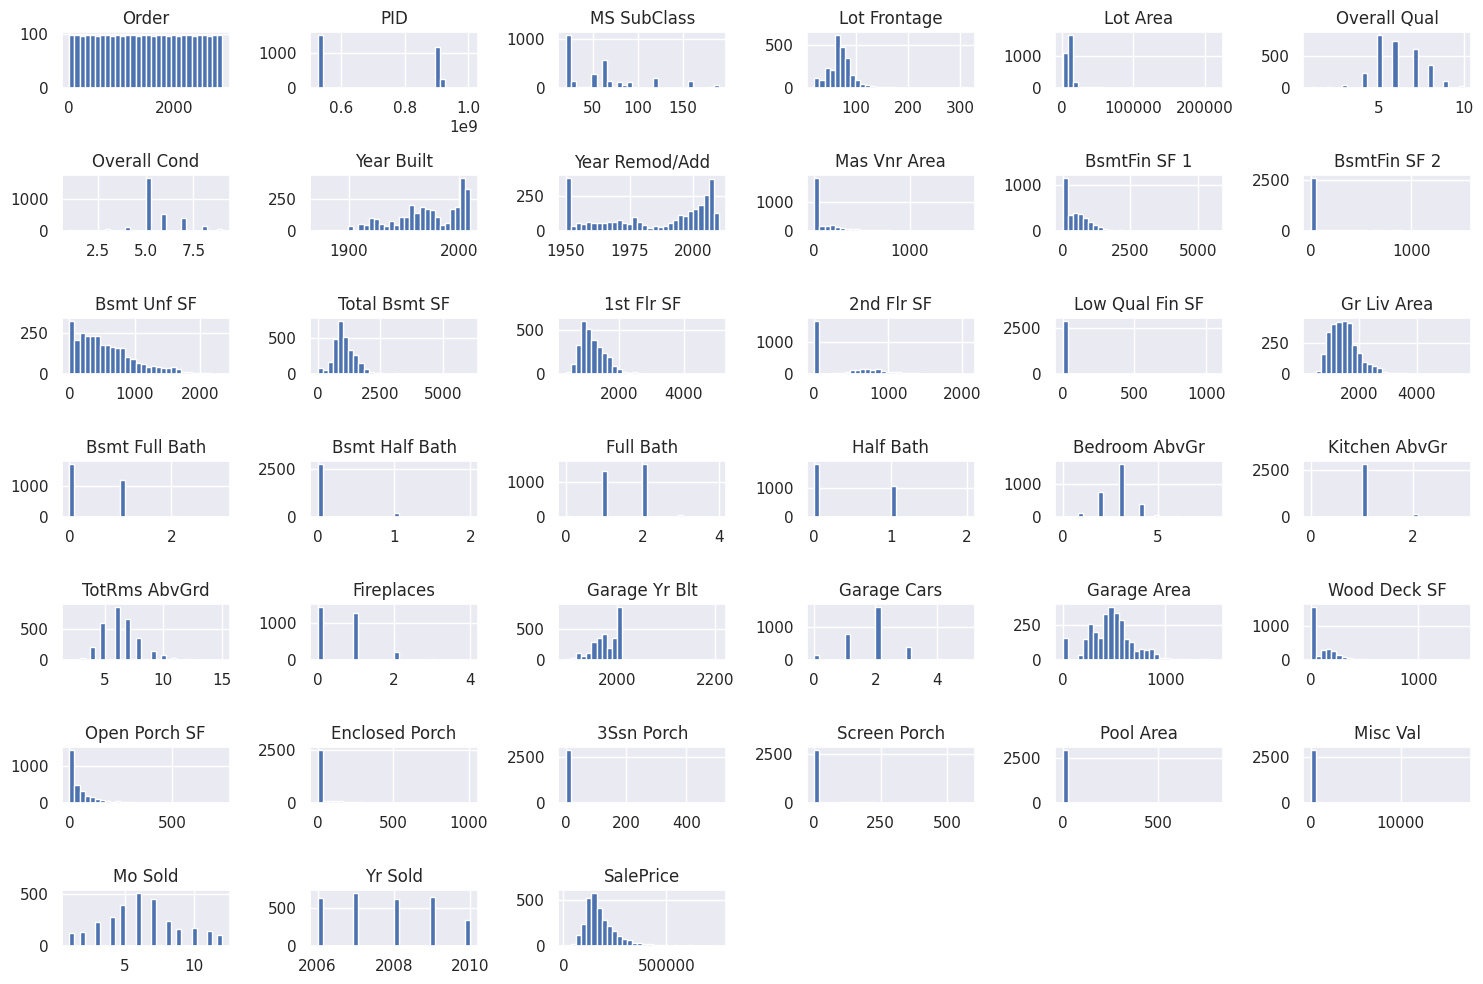

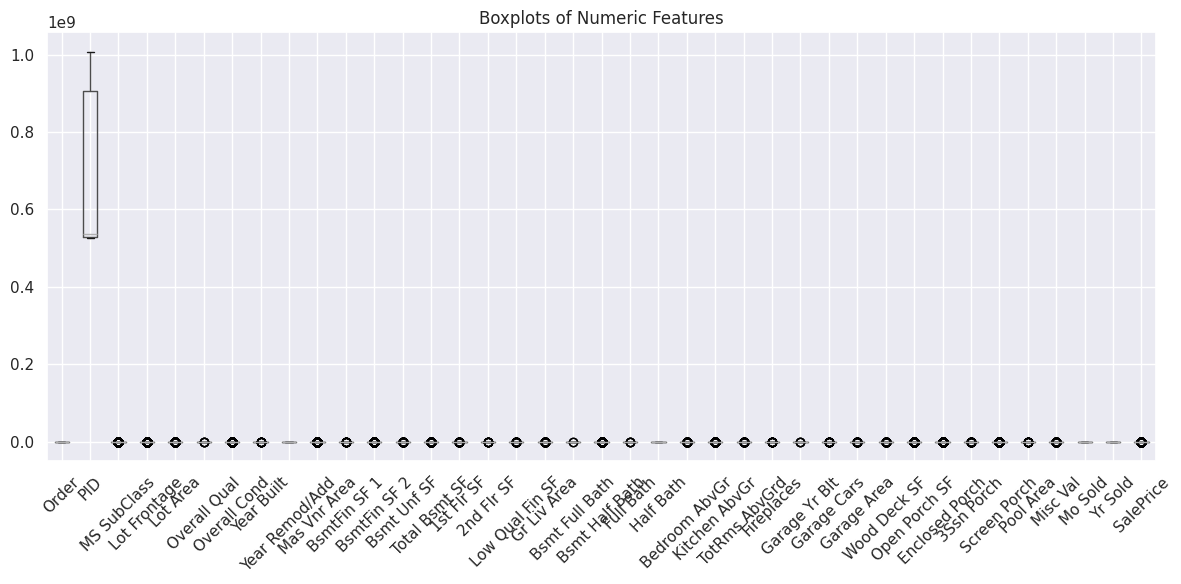


=== SKEWNESS ===
Order               0.000000
PID                 0.055886
MS SubClass         1.357579
Lot Frontage        1.499067
Lot Area           12.820898
Overall Qual        0.190634
Overall Cond        0.574429
Year Built         -0.604462
Year Remod/Add     -0.451863
Mas Vnr Area        2.606985
BsmtFin SF 1        1.416182
BsmtFin SF 2        4.139978
Bsmt Unf SF         0.923053
Total Bsmt SF       1.156204
1st Flr SF          1.469429
2nd Flr SF          0.866457
Low Qual Fin SF    12.118162
Gr Liv Area         1.274110
Bsmt Full Bath      0.616639
Bsmt Half Bath      3.940795
Full Bath           0.171952
Half Bath           0.697713
Bedroom AbvGr       0.305694
Kitchen AbvGr       4.313825
TotRms AbvGrd       0.753543
Fireplaces          0.739215
Garage Yr Blt      -0.384672
Garage Cars        -0.219836
Garage Area         0.241994
Wood Deck SF        1.842678
Open Porch SF       2.535386
Enclosed Porch      4.014446
3Ssn Porch         11.403795
Screen Porch        3.957

In [44]:
# ## 4. Quick EDA: Distributions & Outliers
# - Histograms
# - Boxplots
# - Basic skewness check
#
# NOTE: Adjust `numeric_cols` list to your dataset.
# 4. EDA - DISTRIBUTIONS

numeric_cols = df.select_dtypes(include=[np.number]).columns.tolist()
print("Numeric columns:", numeric_cols)

# Histograms
df[numeric_cols].hist(bins=30, figsize=(15, 10))
plt.tight_layout()
plt.show()

# Boxplots for numeric columns
plt.figure(figsize=(12, 6))
df[numeric_cols].boxplot()
plt.xticks(rotation=45)
plt.title("Boxplots of Numeric Features")
plt.tight_layout()
plt.show()

# Skewness
print("\n=== SKEWNESS ===")
print(df[numeric_cols].skew())



Key features for pairplot: ['Order', 'PID', 'MS SubClass', 'Lot Frontage']


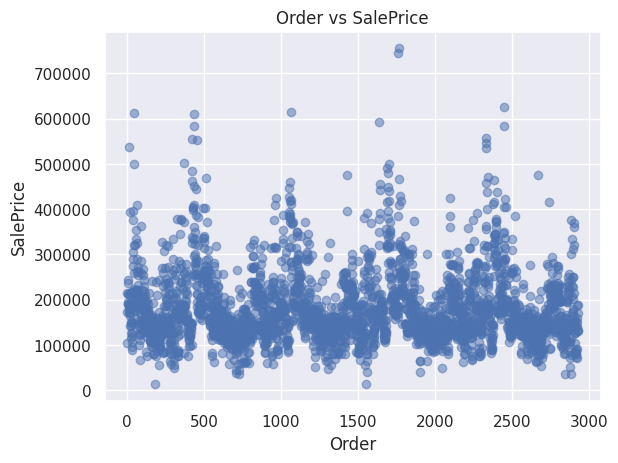

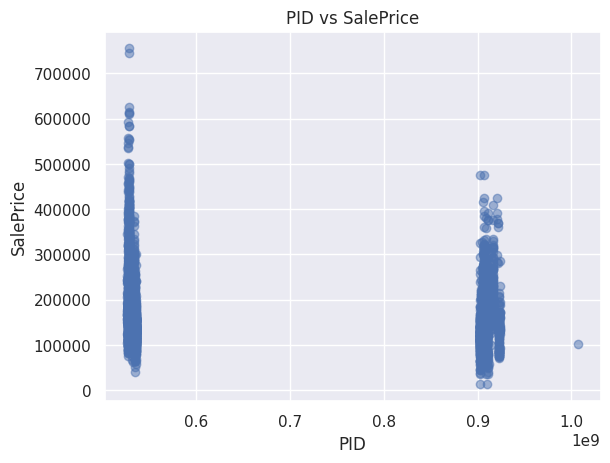

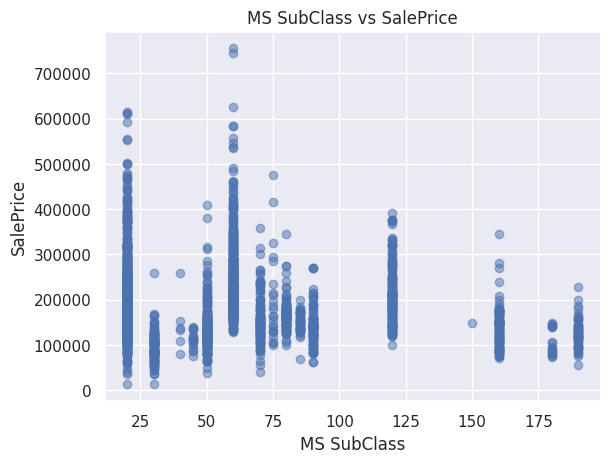

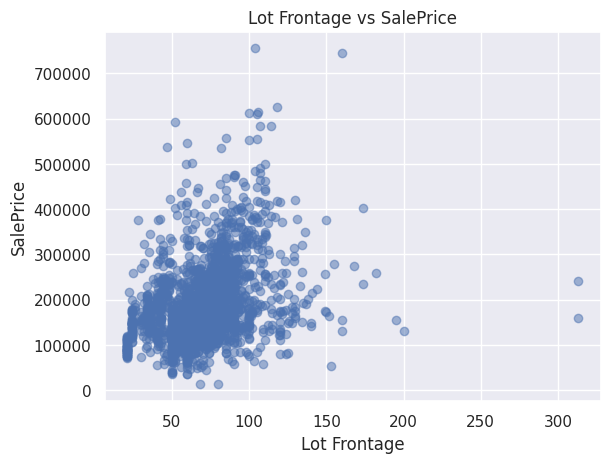

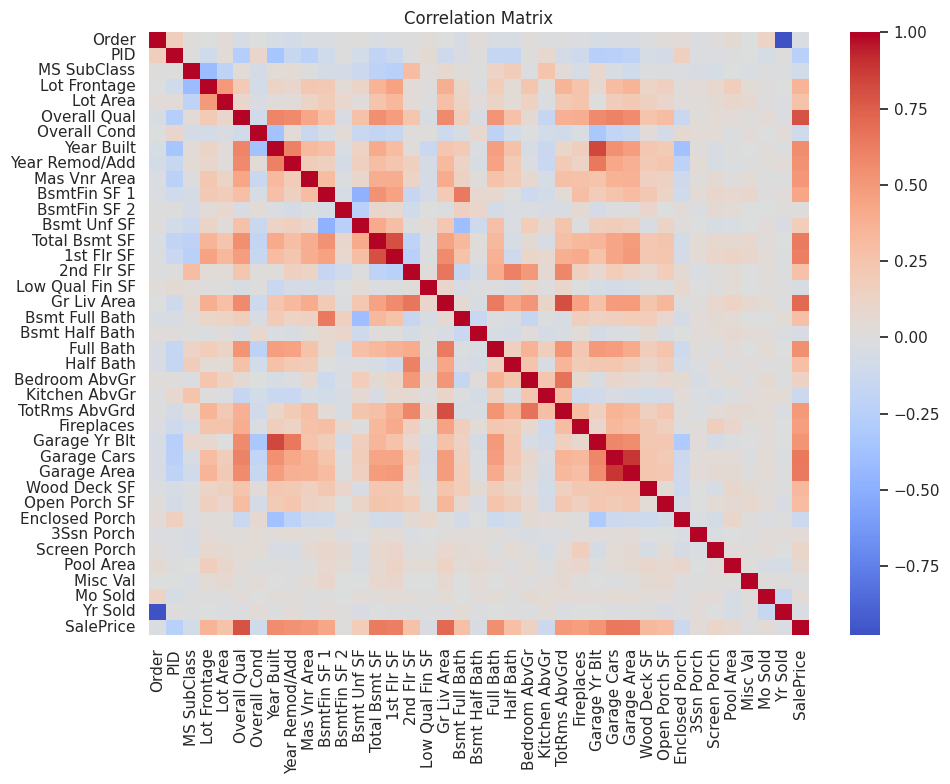

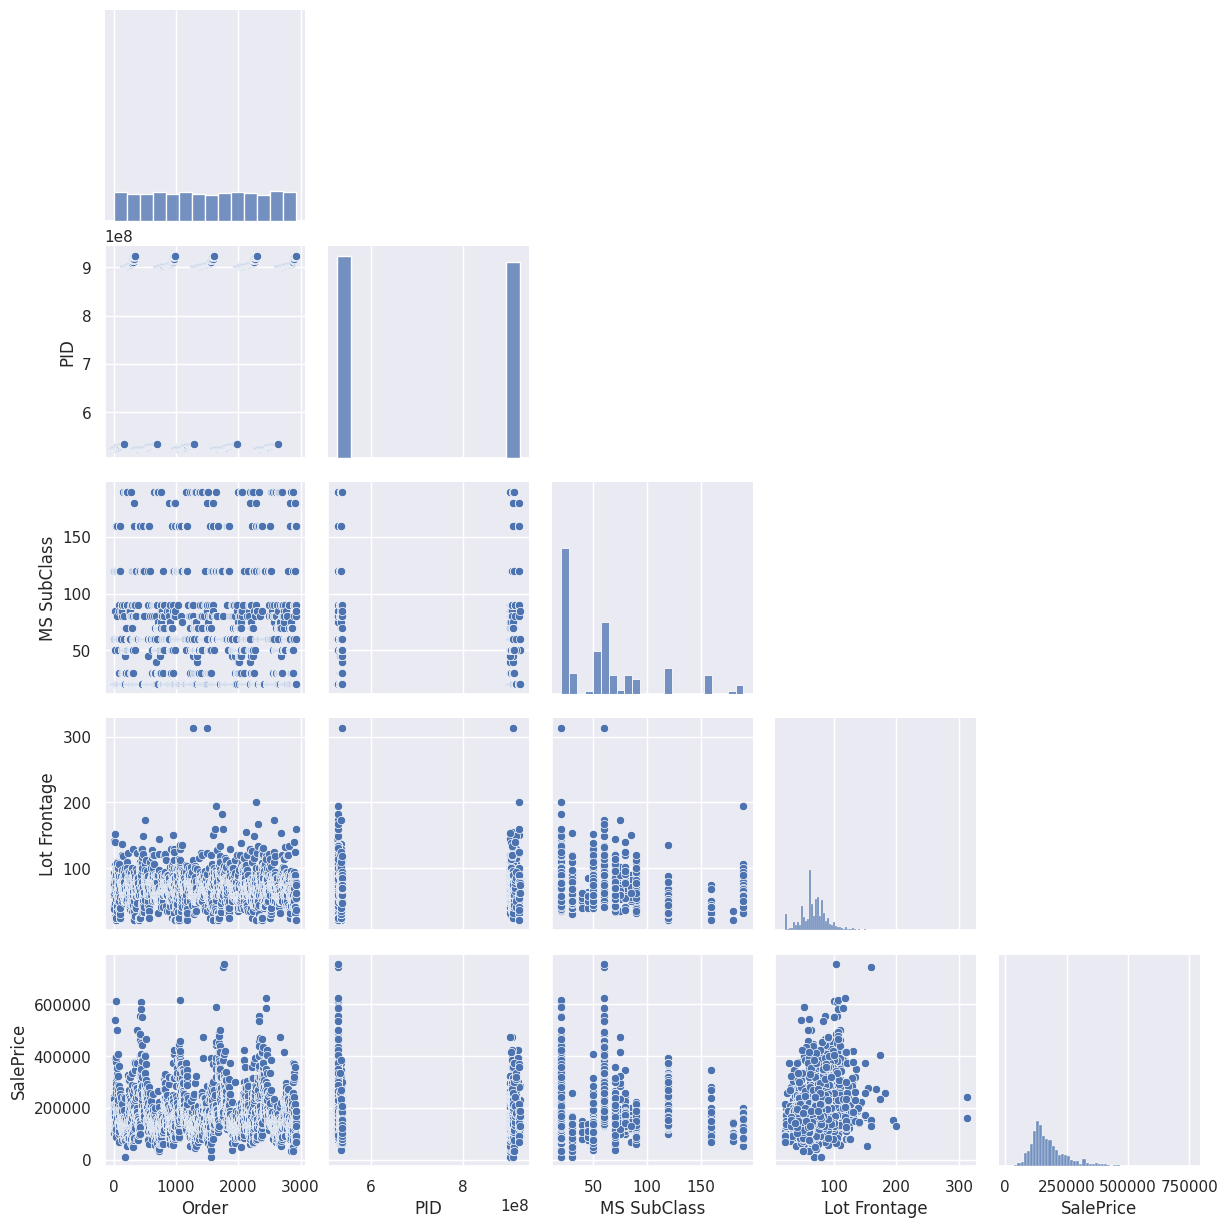

In [45]:
# ## 5. Relationships: Scatter, Correlation, Pairplot
# - Use this cell when dataset is not huge.
# - Adjust `key_features` to a smaller subset if needed.
# 5. EDA - RELATIONSHIPS

# TODO: Set your target column
TARGET_COL = "SalePrice" #This will always be Y, or desired prediction

# Choose a few key features for scatter / pairplot
key_features = [col for col in numeric_cols if col != TARGET_COL][:4]
print("Key features for pairplot:", key_features)

if TARGET_COL in df.columns:
    # Simple scatter with target if numeric
    if np.issubdtype(df[TARGET_COL].dtype, np.number):
        for col in key_features:
            plt.figure()
            plt.scatter(df[col], df[TARGET_COL], alpha=0.5)
            plt.xlabel(col)
            plt.ylabel(TARGET_COL)
            plt.title(f"{col} vs {TARGET_COL}")
            plt.show()

# Correlation matrix
corr = df[numeric_cols].corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=False, cmap="coolwarm", center=0)
plt.title("Correlation Matrix")
plt.tight_layout()
plt.show()

# Pairplot (small feature subset)
if len(key_features) > 1:
    sns.pairplot(df[key_features + [TARGET_COL]].dropna(), corner=True)
    plt.show()


In [46]:
# ## 6. Handle Missing Data & Obvious Cleaning
# - Light-touch template. Customize as needed.
# - Options: drop rows, impute, custom rules.

# 6. CLEANING

# Standardize column names to snake_case
import re

def to_snake(col):
    # Replace spaces and hyphens with underscore
    col = re.sub(r"[ -]+", "_", col)

    # Insert underscore before capital letters (except first)
    # col = re.sub(r"(?<!^)([A-Z])", r"_\1", col)

    # Convert to lowercase
    # col = col.lower()

    return col

df.columns = [to_snake(col) for col in df.columns]

# print("Updated column names:")
# print(df.columns.tolist())

# Identify missing data
missing_summary = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_summary.head(20))


Missing values per column:
Pool_QC           2917
Misc_Feature      2824
Alley             2732
Fence             2358
Mas_Vnr_Type      1775
Fireplace_Qu      1422
Lot_Frontage       490
Garage_Qual        159
Garage_Yr_Blt      159
Garage_Cond        159
Garage_Finish      159
Garage_Type        157
Bsmt_Exposure       83
BsmtFin_Type_2      81
Bsmt_Qual           80
Bsmt_Cond           80
BsmtFin_Type_1      80
Mas_Vnr_Area        23
Bsmt_Full_Bath       2
Bsmt_Half_Bath       2
dtype: int64


6.1 DROP ROWS ONLY WHEN NECESSARY

Only drop:

rows missing the target

rows that are mostly empty

rows containing invalid data (e.g., negative square footage)

6.2 IMPUTE NUMERIC COLUMNS

Why median?

Median is robust to outliers
Mean gets distorted badly.

6.3 IMPUTE CATEGORICAL COLUMNS

Most common strategies:

Mode (most frequent value)

Works well when missing data is small.

Binary flag existence, set missing to None.  Use smart logic to determine if data was missing or just entered incorrectly.
This is unique to each Category.  Use the information you have.

A missing value indicator can be extremely predictive.

Example:

A missing basement quality often means “no basement”

A missing fireplace quality often means “no fireplace”

for col in df.columns:
    df[col + "_was_missing"] = df[col].isna().astype(int)


This adds search-light columns that say:

1 = was missing

0 = was present


Will oneHotOff or ordinal later.  This is all data cleaning.

6.5 CLEAN OBVIOUS BAD VALUES

Examples:

Square footage cannot be negative.

Lot area cannot be zero.

Quality ratings must be one of the known categories.

df['Gr_Liv_Area'] = df['Gr_Liv_Area'].clip(lower=0)

6.6 NORMALIZE TEXT DATA (easy mistakes)

Common cleaning:

df[col] = df[col].str.strip().str.lower()
df[col] = df[col].str.replace('-', '_')


Cleaning avoids:

duplicates (“Ex”, “ex”, “ EX”)

weird Unicode

inconsistent punctuation

6.8 Final Check: Data Must Be Fully Clean

After imputation:

print(df.isna().sum().sum())   # should be 0

If NOT zero → model will crash.


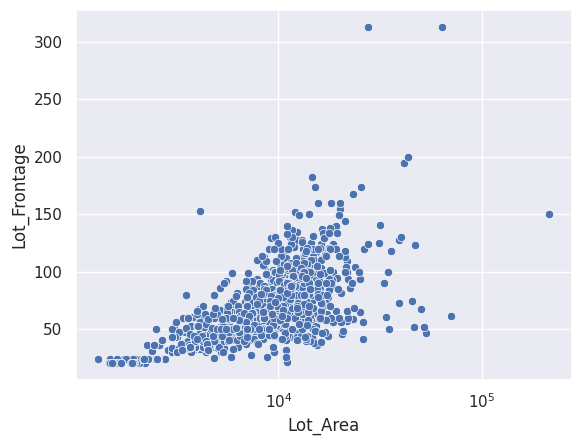

,Lot_Area,Lot_Frontage
Lot_Area,1.000000,0.491313
Lot_Frontage,0.491313,1.000000


In [47]:
# Lets see if there is a positive correlation between Lot_Area and Lot_Frontage

sns.scatterplot(x=df["Lot_Area"], y=df["Lot_Frontage"])
plt.xscale("log")  # because Lot_Area spans huge ranges
plt.show()

df[["Lot_Area", "Lot_Frontage"]].corr()

# There is, so lets impute missing Lot_Frontage values based on Lot_Area



In [48]:
# ========================================
# IMPUTE LOT_FRONTAGE USING LOT_AREA RATIO
# ========================================

print("Missing Lot_Frontage BEFORE:", df["Lot_Frontage"].isna().sum())

# 1. Create missingness flag (always useful for models)
df["Lot_Frontage_missing"] = df["Lot_Frontage"].isna().astype(int)

# 2. Compute typical depth = Lot_Area / Lot_Frontage
#    (only using rows where both values exist)
valid = df.dropna(subset=["Lot_Frontage", "Lot_Area"])

# Avoid divide-by-zero rows
valid = valid[valid["Lot_Frontage"] > 0]

median_depth = (valid["Lot_Area"] / valid["Lot_Frontage"]).median()
print("Median lot depth (Lot_Area / Lot_Frontage):", median_depth)

# 3. Impute missing frontage as Lot_Area / median_depth
mask_missing = df["Lot_Frontage"].isna()

df.loc[mask_missing, "Lot_Frontage"] = (
    df.loc[mask_missing, "Lot_Area"] / median_depth
)

print("Missing Lot_Frontage AFTER:", df["Lot_Frontage"].isna().sum())
print("Imputed Lot_Frontage for", mask_missing.sum(), "rows")


Missing Lot_Frontage BEFORE: 490
Median lot depth (Lot_Area / Lot_Frontage): 129.34105571847505
Missing Lot_Frontage AFTER: 0
Imputed Lot_Frontage for 490 rows


In [49]:
# Handle pool weirdness

print(df["Pool_QC"].value_counts(dropna=False))
print(df["Pool_Area"].describe())
# Impute Pool_QC based on Pool_Area
df["Has_Pool"] = (
    (df["Pool_Area"] > 0) | df["Pool_QC"].notna()
).astype(int)
# For rows where we believe there is NO pool, set quality to "None"
no_pool_mask = (df["Has_Pool"] == 0) & (df["Pool_QC"].isna())
df.loc[no_pool_mask, "Pool_QC"] = "None"
print("After imputation of Pool_QC based on Pool_Area:")
print(df["Pool_QC"].value_counts(dropna=False))

Pool_QC
NaN    2917
Ex        4
Gd        4
TA        3
Fa        2
Name: count, dtype: int64
count    2930.000000
mean        2.243345
std        35.597181
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max       800.000000
Name: Pool_Area, dtype: float64
After imputation of Pool_QC based on Pool_Area:
Pool_QC
None    2917
Ex         4
Gd         4
TA         3
Fa         2
Name: count, dtype: int64


In [50]:
#Handle Hassing Misc_Feature, add Boolean flag column
# Replace NA with None, strip whitespace

print(df["Misc_Feature"].value_counts(dropna=False))
df["Has_Misc_Feature"] = df["Misc_Feature"].notna().astype(int)
df["Misc_Feature"] = df["Misc_Feature"].fillna("None")
df["Misc_Feature"] = df["Misc_Feature"].str.strip()
df["Misc_Feature"].value_counts()

Misc_Feature
NaN     2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: count, dtype: int64


Misc_Feature
None    2824
Shed      95
Gar2       5
Othr       4
Elev       1
TenC       1
Name: count, dtype: int64

In [51]:
#Handle Alley
print(df["Alley"].value_counts(dropna=False))
# ============================
# CLEANING: Alley
# ============================

print("Before:")
print(df["Alley"].value_counts(dropna=False))

# 1. Boolean flag—does the house have alley access?
df["Has_Alley"] = df["Alley"].notna().astype(int)

# 2. Replace NA with explicit category "None"
df["Alley"] = df["Alley"].fillna("None")

# 3. Clean whitespace just in case
df["Alley"] = df["Alley"].str.strip()

print("\nAfter:")
print(df["Alley"].value_counts())
print(df["Has_Alley"].value_counts())


Alley
NaN     2732
Grvl     120
Pave      78
Name: count, dtype: int64
Before:
Alley
NaN     2732
Grvl     120
Pave      78
Name: count, dtype: int64

After:
Alley
None    2732
Grvl     120
Pave      78
Name: count, dtype: int64
Has_Alley
0    2732
1     198
Name: count, dtype: int64


In [52]:
# ============================
# CLEANING: Fence
# ============================

print("Before:")
print(df["Fence"].value_counts(dropna=False))

# 1. Feature flag — does the house have ANY fenced enclosure?
df["Has_Fence"] = df["Fence"].notna().astype(int)

# 2. Replace NaN with explicit category "None"
df["Fence"] = df["Fence"].fillna("None")

# 3. Clean whitespace (always safe)
df["Fence"] = df["Fence"].str.strip()

print("\nAfter:")
print(df["Fence"].value_counts())
print(df["Has_Fence"].value_counts())


Before:
Fence
NaN      2358
MnPrv     330
GdPrv     118
GdWo      112
MnWw       12
Name: count, dtype: int64

After:
Fence
None     2358
MnPrv     330
GdPrv     118
GdWo      112
MnWw       12
Name: count, dtype: int64
Has_Fence
0    2358
1     572
Name: count, dtype: int64


In [53]:
# ============================
# CLEANING: Mas_Vnr_Type
# ============================

# Ai defiiniely help with this one.  Didn't really think to include Masonry Veneer
# area as a qualifier for what the data meant.  If 0, NA means None.  If >0, NA means Unknown.

print("Before:")
print(df["Mas_Vnr_Type"].value_counts(dropna=False))

# 1. Feature flag — does the house have a masonry veneer?
df["Has_Masonry_Veneer"] = (df["Mas_Vnr_Area"] > 0).astype(int)

# 2. Case 1: Area == 0 → definitely None
none_mask = (df["Mas_Vnr_Area"] == 0) & (df["Mas_Vnr_Type"].isna())
df.loc[none_mask, "Mas_Vnr_Type"] = "None"

# 3. Case 2: Area > 0 but type is missing → ambiguous → "Unknown"
unknown_mask = (df["Mas_Vnr_Area"] > 0) & (df["Mas_Vnr_Type"].isna())
df.loc[unknown_mask, "Mas_Vnr_Type"] = "Unknown"

# 4. Clean whitespace
df["Mas_Vnr_Type"] = df["Mas_Vnr_Type"].str.strip()

print("\nAfter:")
print(df["Mas_Vnr_Type"].value_counts())
print(df["Has_Masonry_Veneer"].value_counts())


Before:
Mas_Vnr_Type
NaN        1775
BrkFace     880
Stone       249
BrkCmn       25
CBlock        1
Name: count, dtype: int64

After:
Mas_Vnr_Type
None       1745
BrkFace     880
Stone       249
BrkCmn       25
Unknown       7
CBlock        1
Name: count, dtype: int64
Has_Masonry_Veneer
0    1771
1    1159
Name: count, dtype: int64


In [54]:
# ============================
# CLEANING: Fireplace_Qu
# ============================

print("Before:")
print(df["Fireplace_Qu"].value_counts(dropna=False))

# 1. Boolean flag — does the house have a fireplace?
df["Has_Fireplace"] = df["Fireplace_Qu"].notna().astype(int)

# 2. Replace NA with explicit category "None"
df["Fireplace_Qu"] = df["Fireplace_Qu"].fillna("None")

# 3. Clean whitespace
df["Fireplace_Qu"] = df["Fireplace_Qu"].str.strip()

print("\nAfter:")
print(df["Fireplace_Qu"].value_counts())
print(df["Has_Fireplace"].value_counts())


Before:
Fireplace_Qu
NaN    1422
Gd      744
TA      600
Fa       75
Po       46
Ex       43
Name: count, dtype: int64

After:
Fireplace_Qu
None    1422
Gd       744
TA       600
Fa        75
Po        46
Ex        43
Name: count, dtype: int64
Has_Fireplace
1    1508
0    1422
Name: count, dtype: int64


In [55]:
# Handle Garage
#1.  Intelligently determine the boolean flag for Has_Garage based on available data
df["Has_Garage"] = (
    (df["Garage_Cars"] > 0) | 
    (df["Garage_Area"] > 0) | 
    (df["Garage_Type"].notna())
).astype(int)
#2 Use the boolean flag to impute missing Garage_Type values
# If no garage: type is None
df.loc[(df["Has_Garage"] == 0) & (df["Garage_Type"].isna()), "Garage_Type"] = "None"

# If garage exists but type missing: mark Unknown
df.loc[(df["Has_Garage"] == 1) & (df["Garage_Type"].isna()), "Garage_Type"] = "Unknown"
print("After handling Garage_Type:")
print(df["Garage_Type"].value_counts(dropna=False))

#3 Use the boolean flag to impute other Garage-related categorical columns
garage_cols = ["Garage_Finish", "Garage_Qual", "Garage_Cond"]

for col in garage_cols:
    # No garage → None
    df.loc[(df["Has_Garage"] == 0) & (df[col].isna()), col] = "None"

    # Garage exists but value missing → Unknown
    df.loc[(df["Has_Garage"] == 1) & (df[col].isna()), col] = "Unknown"

#4 Deal with Garage_Yr_Blt.  Assume same year if possible.

df.loc[df["Has_Garage"] == 0, "Garage_Yr_Blt"] = 0

df.loc[(df["Has_Garage"] == 1) & (df["Garage_Yr_Blt"].isna()), "Garage_Yr_Blt"] = \
    df.loc[(df["Has_Garage"] == 1), "Year_Built"]




After handling Garage_Type:
Garage_Type
Attchd     1731
Detchd      782
BuiltIn     186
None        157
Basment      36
2Types       23
CarPort      15
Name: count, dtype: int64


In [56]:
# ==================================
# CLEANING: Basement block
# ==================================

# 1. Does the house have a basement?
df["Has_Basement"] = (
    (df["Total_Bsmt_SF"] > 0) |
    (df["BsmtFin_SF_1"] > 0) |
    (df["BsmtFin_SF_2"] > 0) |
    (df["Bsmt_Unf_SF"] > 0)
).astype(int)

# 2. Finished vs Unfinished booleans
df["Has_Finished_Basement"] = (
    (df["BsmtFin_SF_1"] > 0) |
    (df["BsmtFin_SF_2"] > 0)
).astype(int)

df["Has_Unfinished_Basement"] = (df["Bsmt_Unf_SF"] > 0).astype(int)

# 3. Clean the categorical basement columns
basement_cols = [
    "Bsmt_Qual", "Bsmt_Cond", "BsmtFin_Type_1", "BsmtFin_Type_2"
]

# 3a. If no basement → fill with "None"
for col in basement_cols:
    df.loc[(df["Has_Basement"] == 0) & (df[col].isna()), col] = "None"

# 3b. If basement exists but NA → "Unknown"
for col in basement_cols:
    df.loc[(df["Has_Basement"] == 1) & (df[col].isna()), col] = "Unknown"

# 4. Special cleaning for Bsmt_Exposure
# NA means "No exposure" IF the house has a basement
df.loc[(df["Has_Basement"] == 0), "Bsmt_Exposure"] = "None"
df.loc[(df["Has_Basement"] == 1) & (df["Bsmt_Exposure"].isna()), "Bsmt_Exposure"] = "No"

# 5. Strip whitespace (safety)
for col in ["Bsmt_Qual", "Bsmt_Cond", "BsmtFin_Type_1", "BsmtFin_Type_2", "Bsmt_Exposure"]:
    df[col] = df[col].astype(str).str.strip()

# 6. Impute missing numeric basement columns with 0 (no basement area)
# 6. Numeric basement fields: set to 0 when no basement, and clean rare NaNs

numeric_basement_cols = [
    "Total_Bsmt_SF",
    "BsmtFin_SF_1",
    "BsmtFin_SF_2",
    "Bsmt_Unf_SF",
    "Bsmt_Full_Bath",
    "Bsmt_Half_Bath",
]

# Case 1: No basement → all numeric basement fields must be 0
for col in numeric_basement_cols:
    df.loc[df["Has_Basement"] == 0, col] = 0

# Case 2: Basement exists but value is NaN → assume 0 (no area / no bath recorded)
for col in numeric_basement_cols:
    df.loc[(df["Has_Basement"] == 1) & (df[col].isna()), col] = 0

# (Optional) cast to int where appropriate
int_basement_cols = ["Bsmt_Full_Bath", "Bsmt_Half_Bath"]
for col in int_basement_cols:
    df[col] = df[col].astype(int)



In [57]:
# ============================
# CLEANING: Mas_Vnr_Type + Mas_Vnr_Area
# ============================

print("Before (type):")
print(df["Mas_Vnr_Type"].value_counts(dropna=False))
print("Before (area NaNs):", df["Mas_Vnr_Area"].isna().sum())

# 1. If area > 0 AND type is NaN → there IS veneer, but type unknown
unknown_mask = (df["Mas_Vnr_Area"] > 0) & (df["Mas_Vnr_Type"].isna())
df.loc[unknown_mask, "Mas_Vnr_Type"] = "Unknown"

# 2. All remaining NaN types → treat as "None" (no veneer)
df.loc[df["Mas_Vnr_Type"].isna(), "Mas_Vnr_Type"] = "None"

# 3. Clean whitespace
df["Mas_Vnr_Type"] = df["Mas_Vnr_Type"].astype(str).str.strip()

# 4. Boolean: has masonry veneer? (now based on cleaned type)
df["Has_Masonry_Veneer"] = (df["Mas_Vnr_Type"] != "None").astype(int)

# 5. Fix Mas_Vnr_Area:
#    Case A: no veneer → area must be 0
none_area_mask = (df["Has_Masonry_Veneer"] == 0) & (df["Mas_Vnr_Area"].isna())
df.loc[none_area_mask, "Mas_Vnr_Area"] = 0

#    Case B: veneer present but area NaN → fill with median for that type
for t in df["Mas_Vnr_Type"].unique():
    type_mask = (df["Mas_Vnr_Type"] == t) & (df["Mas_Vnr_Area"].isna())
    if type_mask.any():
        median_area = df.loc[df["Mas_Vnr_Type"] == t, "Mas_Vnr_Area"].median()
        df.loc[type_mask, "Mas_Vnr_Area"] = median_area

print("\nAfter (type):")
print(df["Mas_Vnr_Type"].value_counts())
print("After (area NaNs):", df["Mas_Vnr_Area"].isna().sum())
print("Has_Masonry_Veneer value counts:")
print(df["Has_Masonry_Veneer"].value_counts())


Before (type):
Mas_Vnr_Type
None       1745
BrkFace     880
Stone       249
BrkCmn       25
NaN          23
Unknown       7
CBlock        1
Name: count, dtype: int64
Before (area NaNs): 23

After (type):
Mas_Vnr_Type
None       1768
BrkFace     880
Stone       249
BrkCmn       25
Unknown       7
CBlock        1
Name: count, dtype: int64
After (area NaNs): 0
Has_Masonry_Veneer value counts:
Has_Masonry_Veneer
0    1768
1    1162
Name: count, dtype: int64


In [58]:
# ============================
# CLEANING: Bsmt_Full_Bath & Bsmt_Half_Bath
# ============================

print("Before:")
print(df["Bsmt_Full_Bath"].value_counts(dropna=False))
print(df["Bsmt_Half_Bath"].value_counts(dropna=False))

# Full bath:
df.loc[df["Bsmt_Full_Bath"].isna(), "Bsmt_Full_Bath"] = 0

# Half bath:
df.loc[df["Bsmt_Half_Bath"].isna(), "Bsmt_Half_Bath"] = 0

# (Optional sanity: cast to integer)
df["Bsmt_Full_Bath"] = df["Bsmt_Full_Bath"].astype(int)
df["Bsmt_Half_Bath"] = df["Bsmt_Half_Bath"].astype(int)

print("\nAfter:")
print(df["Bsmt_Full_Bath"].value_counts())
print(df["Bsmt_Half_Bath"].value_counts())

df["Bsmt_Total_Baths"] = df["Bsmt_Full_Bath"] + 0.5 * df["Bsmt_Half_Bath"]
print("Created Bsmt_Total_Baths feature.")


Before:
Bsmt_Full_Bath
0    1709
1    1181
2      38
3       2
Name: count, dtype: int64
Bsmt_Half_Bath
0    2755
1     171
2       4
Name: count, dtype: int64

After:
Bsmt_Full_Bath
0    1709
1    1181
2      38
3       2
Name: count, dtype: int64
Bsmt_Half_Bath
0    2755
1     171
2       4
Name: count, dtype: int64
Created Bsmt_Total_Baths feature.


In [64]:
# ==========================================
# SHOW ROW INDICES FOR RARE MISSING VALUES
# (columns with fewer than 5 missing entries)
# ==========================================

for col in df.columns:
    missing_idx = df[df[col].isna()].index
    
    if 0 < len(missing_idx) < 24:
        print(f"\nColumn: {col}")
        print(f"Missing count: {len(missing_idx)}")
        print(f"Row indices: {list(missing_idx)}")

missing_summary = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_summary.head(20))
# ==========================================



Missing values per column:
Order           0
PID             0
MS_SubClass     0
MS_Zoning       0
Lot_Frontage    0
Lot_Area        0
Street          0
Alley           0
Lot_Shape       0
Land_Contour    0
Utilities       0
Lot_Config      0
Land_Slope      0
Neighborhood    0
Condition_1     0
Condition_2     0
Bldg_Type       0
House_Style     0
Overall_Qual    0
Overall_Cond    0
dtype: int64


In [61]:
#Filling row 1577 with missing electrical as standard breaker, because home was built in 2008 and Iowa building code likely required it
df.loc[df["Electrical"].isna(), "Electrical"] = "SBrkr"
print("After handling Electrical:")
print(df["Electrical"].value_counts(dropna=False))

After handling Electrical:
Electrical
SBrkr    2683
FuseA     188
FuseF      50
FuseP       8
Mix         1
Name: count, dtype: int64


In [63]:
# ============================
# CLEANING: Garage_Cars & Garage_Area
# ============================

# Boolean: missing but garage exists
mask_missing_garage = (df["Has_Garage"] == 1) & (df["Garage_Cars"].isna() | df["Garage_Area"].isna())

# 1. Impute Garage_Cars with mode for that garage type
for gtype in df["Garage_Type"].unique():
    mode_cars = df.loc[df["Garage_Type"] == gtype, "Garage_Cars"].mode()[0]
    mask = (df["Garage_Type"] == gtype) & df["Garage_Cars"].isna()
    df.loc[mask, "Garage_Cars"] = mode_cars

# 2. Impute Garage_Area with median for garage type
for gtype in df["Garage_Type"].unique():
    median_area = df.loc[df["Garage_Type"] == gtype, "Garage_Area"].median()
    mask = (df["Garage_Type"] == gtype) & df["Garage_Area"].isna()
    df.loc[mask, "Garage_Area"] = median_area

# 3. Fix Garage_Yr_Blt for existing garages
df.loc[(df["Has_Garage"] == 1) & df["Garage_Yr_Blt"].isna(), "Garage_Yr_Blt"] = \
    df[(df["Has_Garage"] == 1)]["Year_Built"]

print("After handling Garage_Cars and Garage_Area:")
print("Missing Garage_Cars:", df["Garage_Cars"].isna().sum())
print("Missing Garage_Area:", df["Garage_Area"].isna().sum())

After handling Garage_Cars and Garage_Area:
Missing Garage_Cars: 0
Missing Garage_Area: 0


In [ ]:
#Lets Export the cleaned data for future use 
CLEANED_DATA_PATH = "AmesHousing_Cleaned.csv"
df.to_csv(CLEANED_DATA_PATH, index=False)
print(f"Cleaned data saved to {CLEANED_DATA_PATH}")

#reassign df to cleaned version for future cells
df = pd.read_csv(CLEANED_DATA_PATH)

# ==========================================
# SHOW ROW INDICES FOR RARE MISSING VALUES
# (columns with fewer than 5 missing entries)
# ==========================================

for col in df.columns:
    missing_idx = df[df[col].isna()].index
    
    if 0 < len(missing_idx) < 24:
        print(f"\nColumn: {col}")
        print(f"Missing count: {len(missing_idx)}")
        print(f"Row indices: {list(missing_idx)}")

missing_summary = df.isna().sum().sort_values(ascending=False)
print("Missing values per column:")
print(missing_summary.head(20))
# ==========================================


Cleaned data saved to AmesHousing_Cleaned.csv


In [ ]:

# ## 7. Define Features (X) and Target (y)
# - Select feature columns explicitly.
# - Split numeric vs categorical.
# - This is where you decide what the model can "see."

# 7. FEATURE / TARGET SETUP

# TODO: decide which columns are features
feature_cols = [c for c in df.columns if c != TARGET_COL]

X = df[feature_cols]
y = df[TARGET_COL]

numeric_features = X.select_dtypes(include=[np.number]).columns.tolist()
categorical_features = X.select_dtypes(exclude=[np.number]).columns.tolist()

print("Feature columns:", feature_cols)
print("Numeric features:", numeric_features)
print("Categorical features:", categorical_features)



In [ ]:
# ## 8. Preprocessing: Encoding & Scaling
# - Numeric: StandardScaler
# - Categorical: OneHotEncoder
# - All wrapped in a ColumnTransformer + Pipeline

# 8. PREPROCESSOR

numeric_transformer = StandardScaler()

categorical_transformer = OneHotEncoder(handle_unknown="ignore")

preprocessor = ColumnTransformer(
    transformers=[
        ("num", numeric_transformer, numeric_features),
        ("cat", categorical_transformer, categorical_features),
    ]
)

# Example model: Linear Regression
regressor = LinearRegression()

# Full pipeline: preprocessing + model
model = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ("regressor", regressor)
])

model



In [ ]:
# ## 9. Train/Test Split
# - Typical split: 80/20 or 70/30.
# - Randomized with fixed `random_state` for reproducibility.

# 9. TRAIN / TEST SPLIT

X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.2,
    random_state=RANDOM_STATE
)

print("Train shape:", X_train.shape)
print("Test shape:", X_test.shape)




In [ ]:
# 10. Train the Model
# - Fit the pipeline on training data.
# 10. TRAIN MODEL

model.fit(X_train, y_train)

print("Model trained.")

In [ ]:
# ## 11. Evaluation on Train and Test Sets
# - R², MAE, RMSE
# - Compare train vs test for over/underfitting.

# 11. EVALUATION

def regression_metrics(y_true, y_pred, label=""):
    r2 = r2_score(y_true, y_pred)
    mae = mean_absolute_error(y_true, y_pred)
    mse = mean_squared_error(y_true, y_pred)
    rmse = np.sqrt(mse)
    print(f"--- {label} ---")
    print(f"R²:   {r2:.4f}")
    print(f"MAE:  {mae:.4f}")
    print(f"RMSE: {rmse:.4f}")
    print()

y_pred_train = model.predict(X_train)
y_pred_test = model.predict(X_test)

regression_metrics(y_train, y_pred_train, label="Train")
regression_metrics(y_test, y_pred_test, label="Test")

In [ ]:
# ## 12. Residual Analysis (Train Set)
# - Check assumptions: linearity, homoscedasticity, normality.
# %%
# 12. RESIDUALS

train_residuals = y_train - y_pred_train

# Residuals vs predicted
plt.figure(figsize=(6, 4))
plt.scatter(y_pred_train, train_residuals, alpha=0.5)
plt.axhline(0, color="red", linestyle="--")
plt.xlabel("Predicted (Train)")
plt.ylabel("Residuals")
plt.title("Residuals vs Predicted (Train)")
plt.tight_layout()
plt.show()

# Histogram of residuals
plt.figure(figsize=(6, 4))
sns.histplot(train_residuals, kde=True)
plt.title("Residuals Distribution (Train)")
plt.tight_layout()
plt.show()

In [ ]:
# ## 13. Cross Validation (Optional but Recommended)
# - K-Fold CV for more robust estimation.
# - Uses the full pipeline (preprocess + model) inside CV.

# 13. CROSS VALIDATION

kf = KFold(n_splits=5, shuffle=True, random_state=RANDOM_STATE)

cv_scores = cross_val_score(model, X, y, cv=kf, scoring="r2")

print("CV R² scores:", cv_scores)
print("CV R² mean:", cv_scores.mean())
print("CV R² std:", cv_scores.std())



In [ ]:
# %% [markdown]
# ## 14. TODO: Iteration Hooks
# - If metrics are poor:
#   - Revisit EDA, transformations, feature engineering.
#   - Consider:
#       - log/box-cox transforms on skewed features
#       - polynomial features or interaction terms
#       - different model (e.g., tree-based)
#   - Use cross-validation + grid search for tuning.
#
# This template gives you:
# - A consistent workflow
# - A place to drop in dataset-specific logic
# - A structure that matches your mental model:
#   import → inspect → visualize → clean → encode/scale → split → train → evaluate → refine.

